## Grafs 23/24 - Sheet 5 - Due 24 December 2023

# Backtracking 


Backtracking is a class of algorithms that navigates the space of partial solutions in a depth first search. It incrementally builds candidates of partial solutions. As soon as it detects that a partial solution cannot be completed to a complete solution, it abandons this path ("backtracks"), and goes back to explore another partial solution until a complete solution is found.

The following toy example uses backtracking to compute all permutations of a list. A partial solution consists of the first `k` entries of a permutation.

In [1]:
def permutations (L):
# returns a list containing all the permutations of L
    
    def swap(L,i,j):
#         Auxiliar function that swaps two entries of a list
        aux=L[i]
        L[i]=L[j]
        L[j]=aux

    
    def recursive_permutations(L,k):
#         Auxiliar recursive function that computes all permutations that 
#         leave invariant the first k entries of L
        
        solutions=[] #will contain the permutations

        if k>= len(L):
#             everything is fixed, there is only one permutation
                return [L.copy()]
        
        for i in range (k,len(L)):
#             we try all possible values at entry k
            swap(L,k,i)
            solutions=solutions+recursive_permutations(L.copy(),k+1)
            swap(L,k,i)
            
        return solutions

    return recursive_permutations(L,0)
    

In [5]:
permutations([1,2,3,4])

[[1, 2, 3, 4],
 [1, 2, 4, 3],
 [1, 3, 2, 4],
 [1, 3, 4, 2],
 [1, 4, 3, 2],
 [1, 4, 2, 3],
 [2, 1, 3, 4],
 [2, 1, 4, 3],
 [2, 3, 1, 4],
 [2, 3, 4, 1],
 [2, 4, 3, 1],
 [2, 4, 1, 3],
 [3, 2, 1, 4],
 [3, 2, 4, 1],
 [3, 1, 2, 4],
 [3, 1, 4, 2],
 [3, 4, 1, 2],
 [3, 4, 2, 1],
 [4, 2, 3, 1],
 [4, 2, 1, 3],
 [4, 3, 2, 1],
 [4, 3, 1, 2],
 [4, 1, 3, 2],
 [4, 1, 2, 3]]

A possible problem with the solution above is that a complete list with all the solutions is created and stored in the memory.

Generators are a python solution to this problem. A generator is a function in which a sequence of solutions are returned in an iterative way (using the command `yield`) but not stored. This allows to loop over the solutions like a list, without having to create the list. For example, the following function mimicks the function `range`.

In [2]:
def our_range(n):
    i=0
    while i<n:
        yield i
        i=i+1

In [3]:
range_gen=our_range(10)

for i in range_gen:
    print(i)
    
print("you can only iterate a generator once. You have to reinitialize before reuse, otherwise")
    
for i in range_gen:
    print(i)

print("but if you reinitialize it, it works again.")
    
range_gen=our_range(10)

for i in range_gen:
    print(i)


0
1
2
3
4
5
6
7
8
9
you can only iterate a generator once. You have to reinitialize before reuse, otherwise
but if you reinitialize it, it works again.
0
1
2
3
4
5
6
7
8
9


In [4]:
for i in our_range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


You can get the next item of a generator using the function next(). If there is no other element, it raises a `StopIteration` exception. You can 'catch the exception' with the code below:

In [5]:
range_gen=our_range(10)

i=next(range_gen)
print(i) 
i=next(range_gen)
print(i) 
i=next(range_gen)
print(i) 
i=next(range_gen)
print(i) 
    

0
1
2
3


In [6]:
for i in range_gen:
    print(i)

4
5
6
7
8
9


In [7]:
i=next(range_gen)
print(i) 


StopIteration: 

In [8]:
range_gen=our_range(10)

while True:
    try:
        i=next(range_gen)
        print(i) 
    except StopIteration:
        print('The generator is empty')
        break


0
1
2
3
4
5
6
7
8
9
The generator is empty


We can turn our previous function into a generator.

In [9]:
def permutations_gen (L):
# returns a generator containing all the permutations of L
    
    def swap(L,i,j):
#         Auxiliar function that swaps two entries of a list
        aux=L[i]
        L[i]=L[j]
        L[j]=aux

    
    def recursive_permutations_gen(L,k):
#         Auxiliar recursive function that returns a generator with all permutations that 
#         leave invariant the first k entries of L
        
        solutions=[] #will contain the permutations

        if k>= len(L):
#             everything is fixed, there is only one permutation
                yield L.copy()
        
        for i in range (k,len(L)):
#             we try all possible values at entry k
            swap(L,k,i)
            for s in recursive_permutations_gen(L.copy(),k+1):
                yield s
            swap(L,k,i)
            
        return

    return recursive_permutations_gen(L,0)
    

In [10]:
permutations_gen([1,2,3])

<generator object permutations_gen.<locals>.recursive_permutations_gen at 0x7f7a4cc68c10>

In [11]:
for p in permutations_gen([1,2,3]):
    print(p)

[1, 2, 3]
[1, 3, 2]
[2, 1, 3]
[2, 3, 1]
[3, 2, 1]
[3, 1, 2]


## Exercise 1

Given a graph $G=(V,E)$, code a generator `perfect_matchings(G)` that yields all the perfect matchings of a simple graph 'G'. You can backtrack whenever $G\setminus V(M)$ has a connected component of odd order, for a partial solution $M$.

In [ ]:
def perfect_matchings(G):

    def perfect_matchings_rec(H): # Auxiliar recursive function that returns a generator 

# Write here the code for Exercise 1

# First, check if the condition to backtrack is satisfied , if so: return
# If the graph is empty, yield an empty list
# Otherwise add an edge and check recursively for perfect matchings
# If you modify the graph G, don't forget to re-modify G afterwards
# Every perfect matching should be returned only once, avoid finding them several times
        return
          
    return perfect_matchings_rec(G.copy())

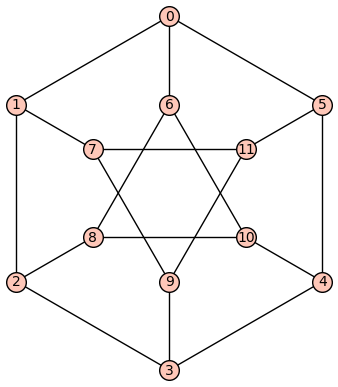

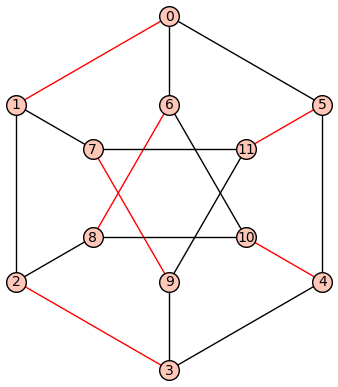

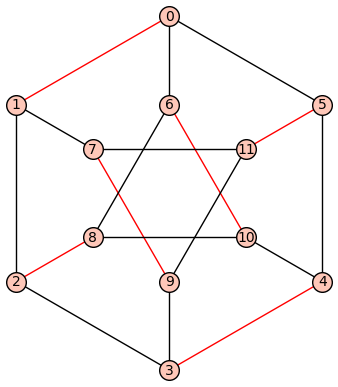

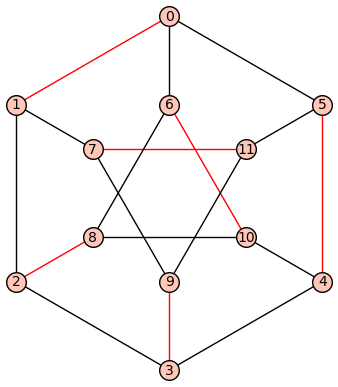

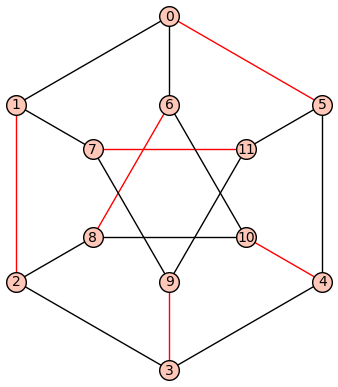

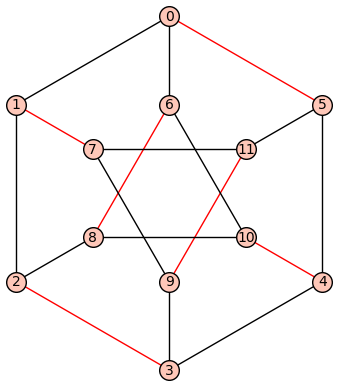

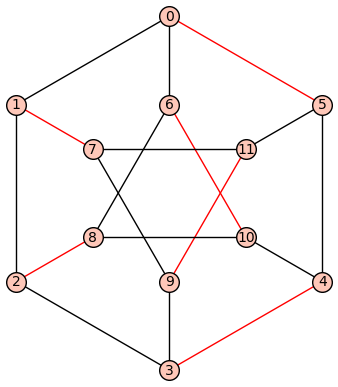

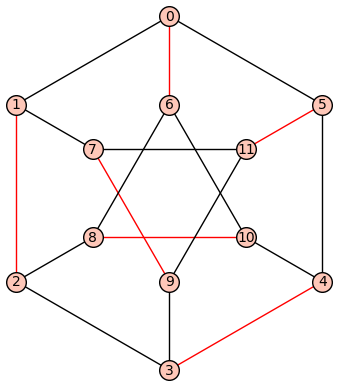

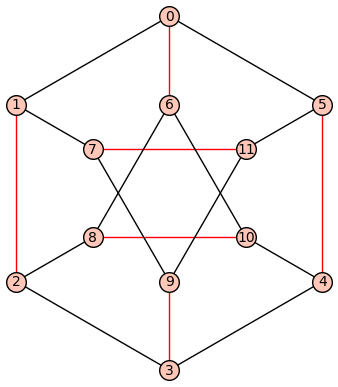

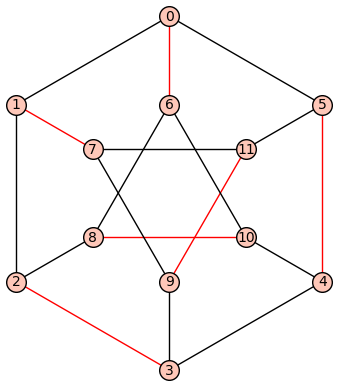

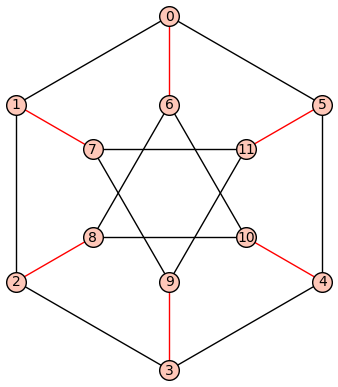

In [13]:
G=graphs.GeneralizedPetersenGraph(6,2)

G.show()

for m in perfect_matchings(G):
    G.show(edge_colors={'red':m})

## Exercise 2

Modify the above function to generate all hamiltonian cycles of a given connected cubic graph (that is, a regular graph of degree 3). Recall that, in a cubic graph, a hamiltonian cycle is the complement of a perfect matching. Therefore, generating hamiltonian cycles is equivalent to generating perfect matchings whose removal do not  disconnect the graph. This means that you can addtionally backtrack if $G\setminus E(M)$ is disconnected.

In [14]:
def hamiltonian_cycles_cubic(G):

# Check if the graph G is cubic
    
    def hamiltonian_cycles_cubic_rec(G_pm,G_ham): # Auxiliar recursive function that returns a generator 

# Write here the code for Exercise 2

        return
    
    return hamiltonian_cycles_cubic_rec(G.copy(),G.copy())


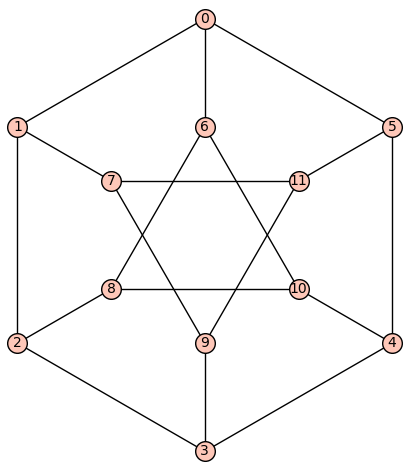

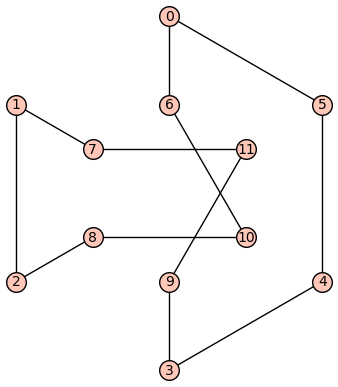

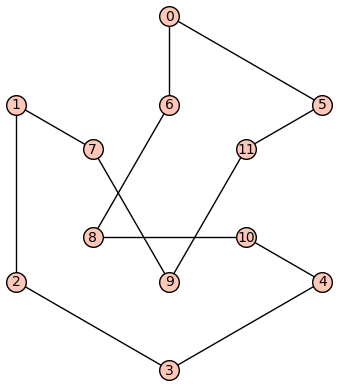

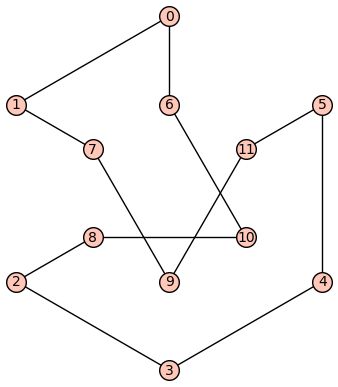

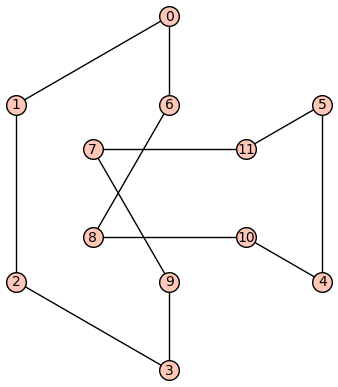

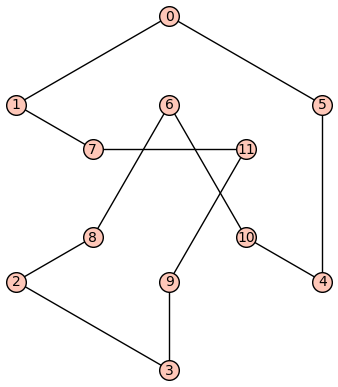

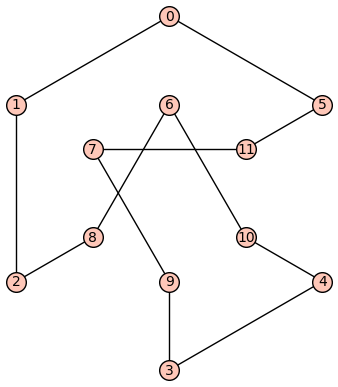

6

In [17]:
G=graphs.GeneralizedPetersenGraph(6,2)

G.plot(save_pos=True).show()
pos=G.get_pos()


count=0
for c in hamiltonian_cycles_cubic(G):
    c.show(pos=pos)
    count+=1
count


## Exercise 3

Write a function that computes the Hamiltonian closure of a graph `G`. Recall that if `G` has  `n` vertices, its Hamiltonian closure is obtained by adding edges between non-adjacent vertices whose sum of degrees is at least `n` as long as you can do so.

In [ ]:
def hamiltonian_closure(G):
    #Write your code here

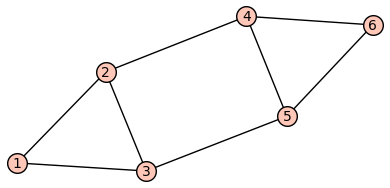

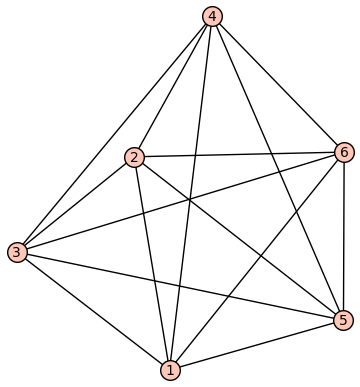

In [19]:
G=Graph([(1,2),(1,3),(2,3),(2,4),(3,5),(4,5),(4,6),(5,6)])
G.show()
G=hamiltonian_closure(G)
G.show()

## Exercise 4

Write a function that generates all Hamiltonian cycles of a given simple graph `G`.



In [21]:
def hamiltonian_cycles(G):
    #Write your code here

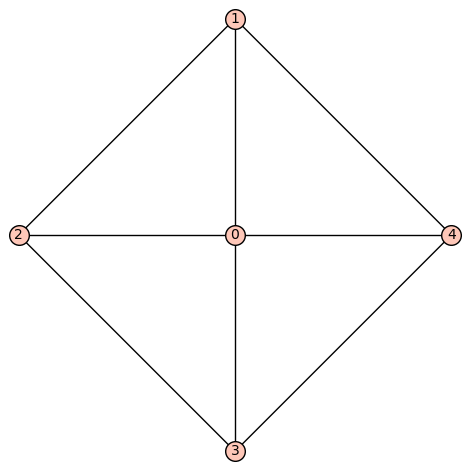

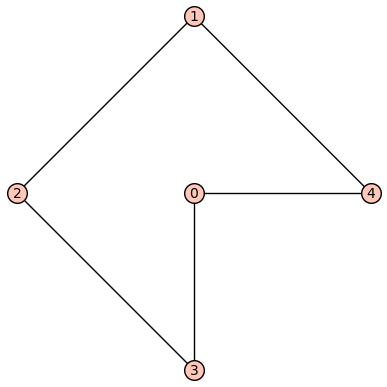

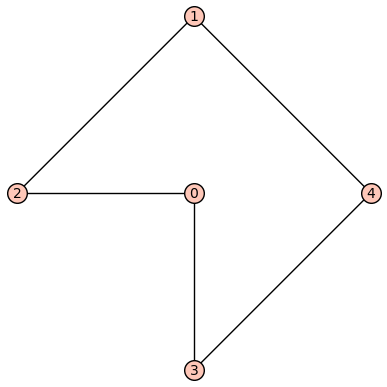

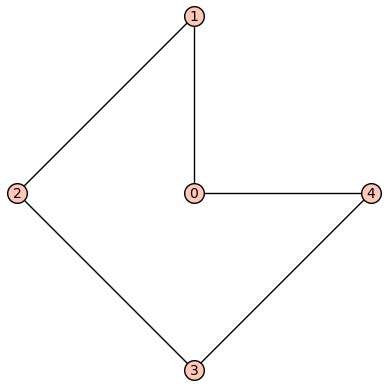

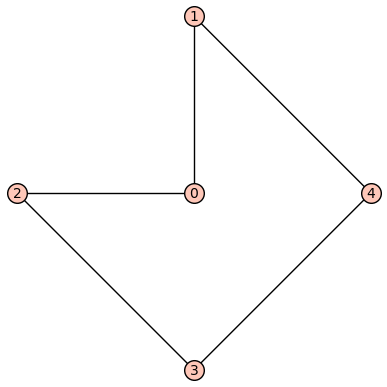

In [23]:
G=graphs.WheelGraph(5)

G.plot(save_pos=True).show()
pos=G.get_pos()


for c in hamiltonian_cycles(G):
    c.show(pos=pos)

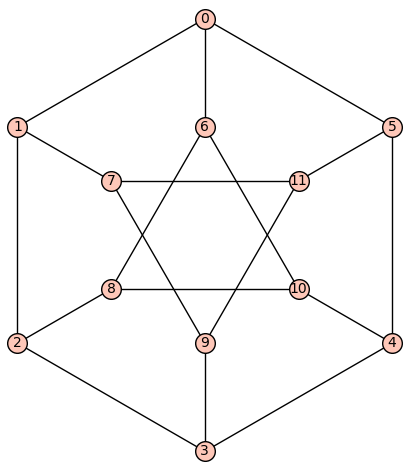

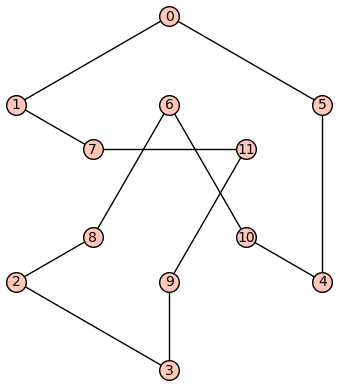

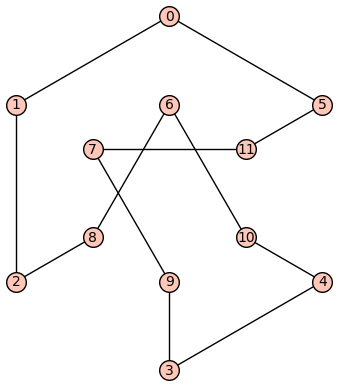

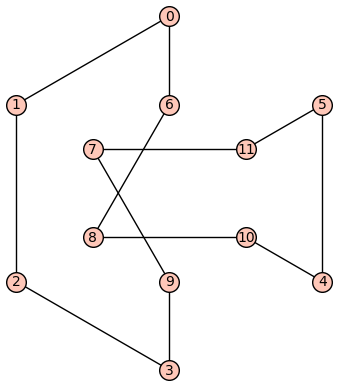

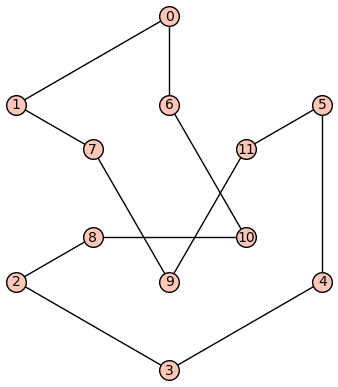

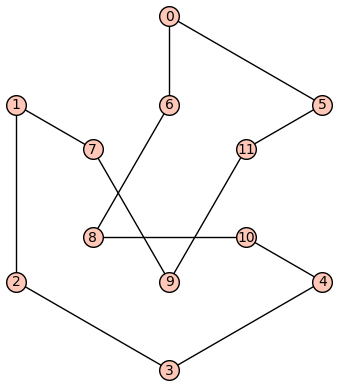

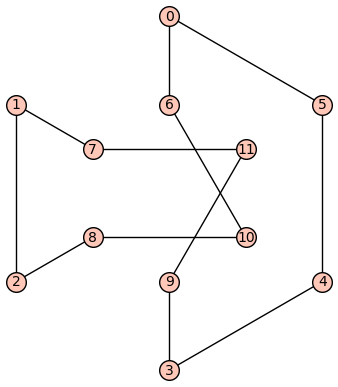

6

In [24]:
G=graphs.GeneralizedPetersenGraph(6,2)

G.plot(save_pos=True).show()
pos=G.get_pos()

count=0
for c in hamiltonian_cycles(G):
    c.show(pos=pos)
    count +=1

count

## Exercise 5

Adapt the previous algorithm to solve the Traveling Salesman Problem on graphs with non-negative weights. That is, to compute the Hamiltonian cycle of minimal weight in a weighted graph. The fact that the weights are non-negative allows to introduce an additional backtracking condition: if the current partial cycle has larger weight than our current best hamiltonian cycle, we can abort.

In [ ]:
def tsp(G):
    #Write your code here

/tmp/ipykernel_63936/155792591.py:12: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See https://github.com/sagemath/sage/issues/27408 for details.
  for e in G.edges():


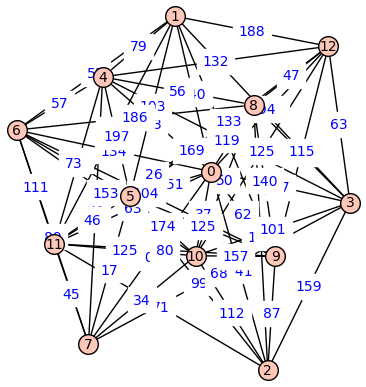

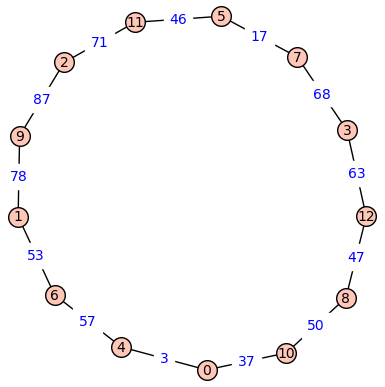

/tmp/ipykernel_63936/155792591.py:30: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See https://github.com/sagemath/sage/issues/27408 for details.
  print('cost =', sum(e[Integer(2)] for e in sageTSP.edges()))


cost = 677


KeyboardInterrupt: 

In [26]:
import time,random

N=13

G=graphs.RandomGNP(N,.75)


while not G.is_connected():
    print("Random graph was not connected. Let's try again" )
    G=graphs.RandomGNP(N,.75)

for e in G.edges():
    G.set_edge_label(e[0],e[1],random.randint(0,200))
    

    
    
G.show(edge_labels=True)




start_time = time.time()

sageTSP=G.traveling_salesman_problem(use_edge_labels=True)

time_sage=time.time() - start_time
  
sageTSP.show(edge_labels=True)
print('cost =', sum(e[2] for e in sageTSP.edges()))


start_time = time.time()
myTSP=tsp(G)

time_our=time.time() - start_time

myTSP.show(edge_labels=True)
print('cost =', sum(e[2] for e in myTSP.edges()))

print(sageTSP==myTSP)

print("sage implementation:", time_sage," our implementation:", time_our)


## Exercise 6

Combine `hamiltonian_closure` and the generator `hamiltonian_cycles` to check whether a given connected graph is Hamiltonian.

In [ ]:
def is_hamiltonian(G):
    #Write your code here

In [29]:
for n in range(3,15):
    for k in range(1,(n-1)//2 +1):
        G=graphs.GeneralizedPetersenGraph(n,k)
        print('sage: ',G.is_hamiltonian(),' we:',is_hamiltonian(G))

sage:  True  we: True
sage:  True  we: True
sage:  True  we: True
sage:  False  we: False
sage:  True  we: True
sage:  True  we: True
sage:  True  we: True
sage:  True  we: True
sage:  True  we: True
sage:  True  we: True
sage:  True  we: True
sage:  True  we: True
sage:  True  we: True
sage:  True  we: True
sage:  True  we: True
sage:  True  we: True
sage:  True  we: True
sage:  True  we: True
sage:  True  we: True
sage:  True  we: True
sage:  True  we: True
sage:  False  we: False
sage:  True  we: True
sage:  True  we: True
sage:  False  we: False
sage:  True  we: True
sage:  True  we: True
sage:  True  we: True
sage:  True  we: True
sage:  True  we: True
sage:  True  we: True
sage:  True  we: True
sage:  True  we: True
sage:  True  we: True
sage:  True  we: True
sage:  True  we: True
sage:  True  we: True
sage:  True  we: True
sage:  True  we: True
sage:  True  we: True
sage:  True  we: True
sage:  True  we: True


## Exercise 7

Write a function that computes the greedy coloring of a graph `G` with respect to a given ordering `O` (given as a list of vertices). It should return a dictionary of colors associated to the vertices.

In [ ]:
def greedy_coloring(G,O):
    #Write your code here
    return color

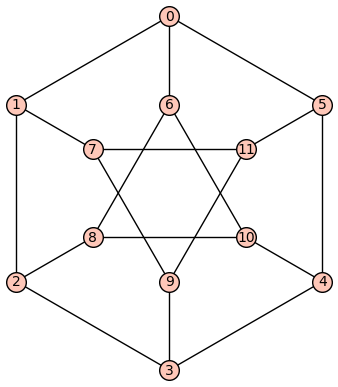

[6, 0, 3, 5, 1, 10, 8, 2, 4, 11, 9, 7]


/tmp/ipykernel_63936/4228346262.py:7: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See https://github.com/sagemath/sage/issues/22349 for details.
  V=G.vertices()
/tmp/ipykernel_63936/3550113764.py:2: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See https://github.com/sagemath/sage/issues/22349 for details.
  color={v:Infinity for v in G.vertices()}


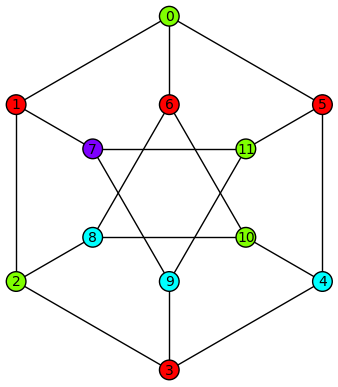

In [31]:
from sage.plot.colors import rainbow
import random

G=graphs.GeneralizedPetersenGraph(6,2)
G.show()

V=G.vertices()

random.shuffle(V)

print(V)

colors=greedy_coloring(G,V)

X=max(colors.values())+1

Rainbow=rainbow(X)

colormap={r:[] for r in Rainbow}

for v in colors:
    colormap[Rainbow[colors[v]]].append(v)
    
G.show(vertex_colors=colormap)


## Exercise 8

Write am algorithm that computes the degeneracy of a graph. If the optional argument `order` is set to `True`, then it returns a degeneracy as well as a list with one ordering of the vertices in which the vertices have to be inserted to attain this degeneracy.

In [ ]:
def degeneracy(G, order=False):
    #Write your code here
    
    if order:
        return (deg,perm)
    return deg


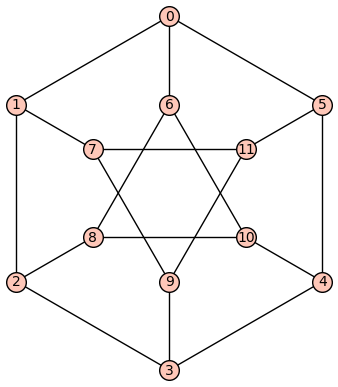

degeneracy= 3 [11, 9, 7, 10, 8, 6, 5, 4, 3, 2, 1, 0]


/tmp/ipykernel_63936/294921742.py:11: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See https://github.com/sagemath/sage/issues/22349 for details.
  V=G.vertices()


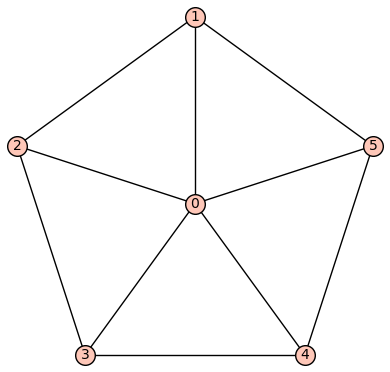

degeneracy= 3 [5, 4, 0, 3, 2, 1]


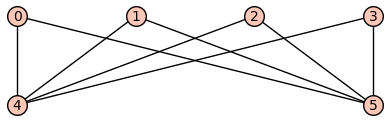

degeneracy= 2 [5, 3, 4, 2, 1, 0]


In [33]:
for G in [graphs.GeneralizedPetersenGraph(6,2),graphs.WheelGraph(6),graphs.CompleteBipartiteGraph(4,2)]:
    G.show()
    deg,order=degeneracy(G,order=True)
    print('degeneracy=',deg,order)



Compare the chromatic number (computed by sage), the number of colors used by the greedy algorithm using an ordering attaining degeneracy, and the degeneracy plus one.

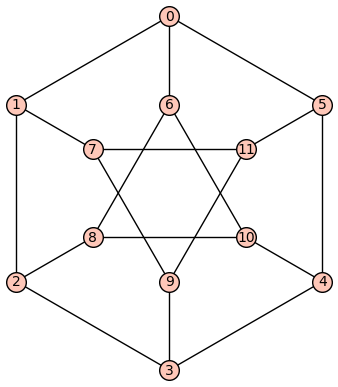

chromatic number =  3 ; greedy coloring =  4 ; degeneracy + 1 =  4


/tmp/ipykernel_63936/294921742.py:11: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See https://github.com/sagemath/sage/issues/22349 for details.
  V=G.vertices()
/tmp/ipykernel_63936/3550113764.py:2: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See https://github.com/sagemath/sage/issues/22349 for details.
  color={v:Infinity for v in G.vertices()}


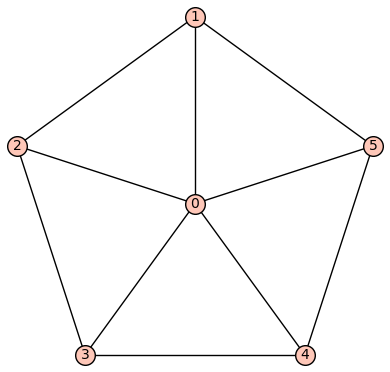

chromatic number =  4 ; greedy coloring =  4 ; degeneracy + 1 =  4


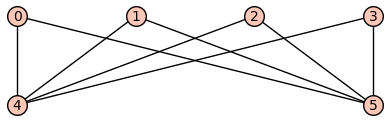

chromatic number =  2 ; greedy coloring =  2 ; degeneracy + 1 =  3


In [34]:
for G in [graphs.GeneralizedPetersenGraph(6,2),graphs.WheelGraph(6),graphs.CompleteBipartiteGraph(4,2)]:
    G.show()
    X=G.chromatic_number()
    deg,order=degeneracy(G,order=True)
    cols=greedy_coloring(G,order)
    gX=max(cols.values())+1
    print('chromatic number = ', X, '; greedy coloring = ', gX, '; degeneracy + 1 = ',deg+1)

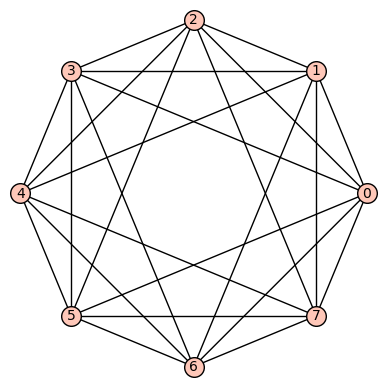

chromatic number =  4 ; greedy coloring =  4 ; degeneracy + 1 =  7


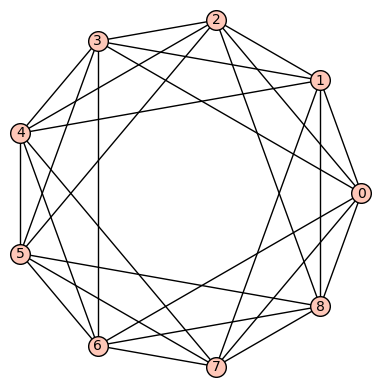

chromatic number =  5 ; greedy coloring =  5 ; degeneracy + 1 =  7


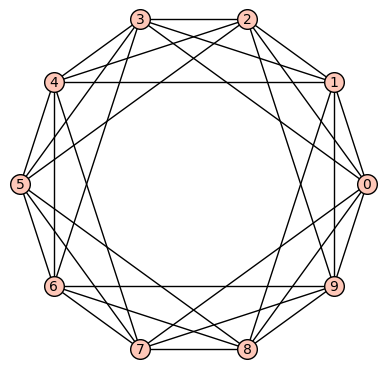

chromatic number =  5 ; greedy coloring =  6 ; degeneracy + 1 =  7


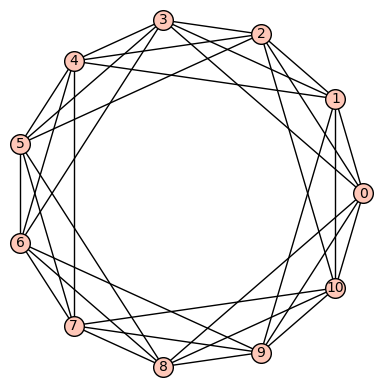

chromatic number =  6 ; greedy coloring =  7 ; degeneracy + 1 =  7


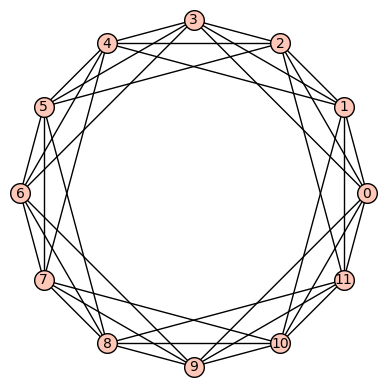

chromatic number =  4 ; greedy coloring =  4 ; degeneracy + 1 =  7


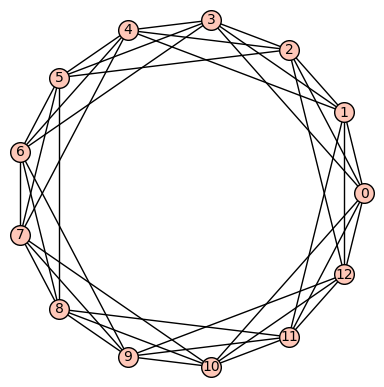

chromatic number =  5 ; greedy coloring =  5 ; degeneracy + 1 =  7


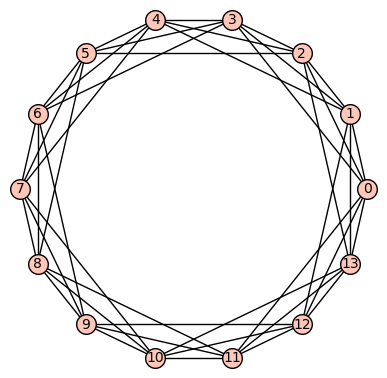

chromatic number =  5 ; greedy coloring =  6 ; degeneracy + 1 =  7


In [45]:
for n in range(8,15):
    G=graphs.CirculantGraph(n,[1,2,3])
    G.show()
    X=G.chromatic_number()
    deg,order=degeneracy(G,order=True)
    cols=greedy_coloring(G,order)
    gX=max(cols.values())+1
    print('chromatic number = ', X, '; greedy coloring = ', gX, '; degeneracy + 1 = ',deg+1)

## Appendix

The following example uses backtracking to compute all ways of selecting `n` cells in an `m x m` grid in such a way that no two cells in the same row or columns are used.

A partial solution would consist of selecting some cells in the first `k` columns in such a way that the constraints are verified. As soon as there are more than `m-k` cells to be distributed in the last `m-k` columns, the algorithm backtracks.

In [12]:
def rook_placement (n,m):
# returns a list containing all the ways of selecting n cells in an m x m grid
# in such a way that there are no two cells in the same row or column
    
    def recursive_rook_placement(n,m,k,forbidden_cols):
#         Auxiliar recursive function that computes a partial solution for the rook placement problem
#         in which only cells in the last m-k rows 
#         and in the columns that do not belong to forbidden_cols can be used

#         forbidden_cols is a set of columns that cannot be used in the solution

#         returns a list containing all the ways of selecting n cells in the last m-k rows of an m x m grid
#         in such a way that there are no two cells in the same row or column, 
#         and no cell is in one of the forbidden_cols
        
        solutions=[] #will contain the solutions

        
        if n>m-k:
#             if we do not have enough columns to place all cells, we cannot complete this solution. 

#             we backtrack and return an empty list
            return solutions



        if n<=0:
#             if we do not have anything to add then the empty solution is the only solution

            solutions.append([])

            return solutions
        
        

        for i in range(k,m):
#                 we try to continue our solution when the next noempty row is i
            for j in range(m):
#                 we try to insert the cell (i,j)

                if not j in forbidden_cols:
                    forbidden_cols.add(j)

                    for sol in recursive_rook_placement(n-1,m,i+1,forbidden_cols):
                        sol.append((i,j))
                        
#                         a solution has been found
                        solutions.append(sol)

                    forbidden_cols.remove(j)

                
        return solutions

#     the main function just calls the recursive function with no forbidden rows and k=0

    return recursive_rook_placement(n,m,0,set())
    

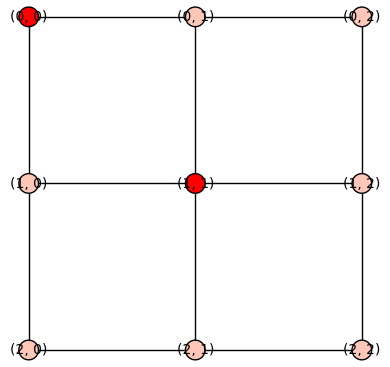

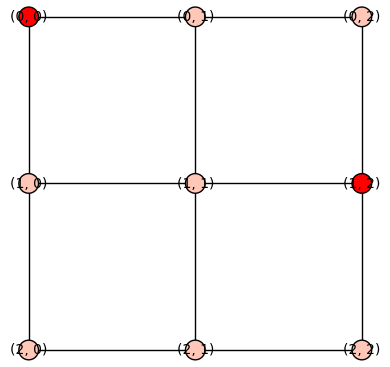

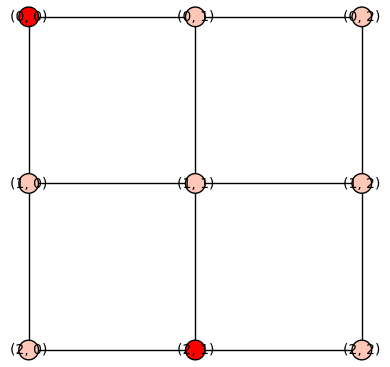

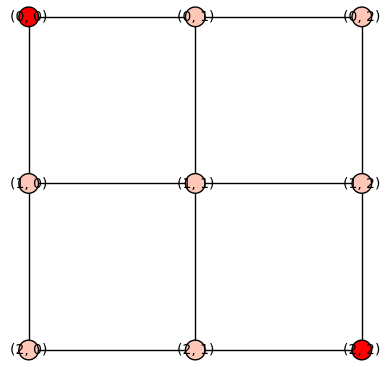

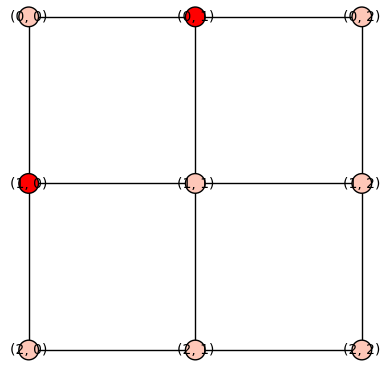

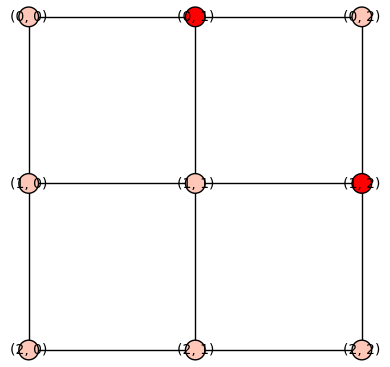

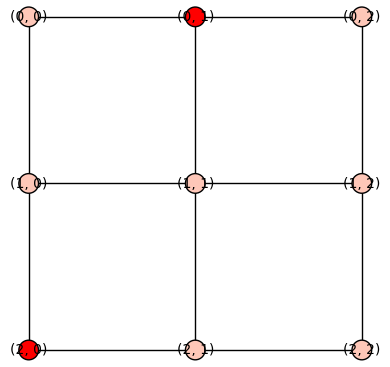

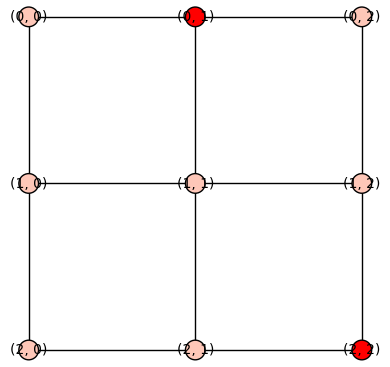

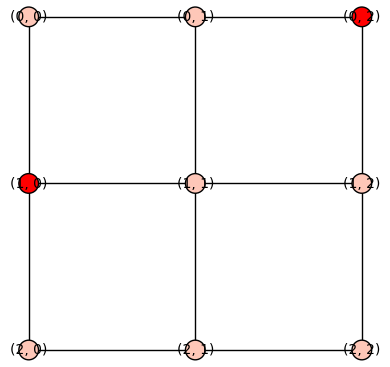

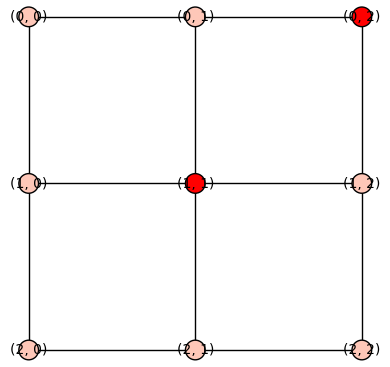

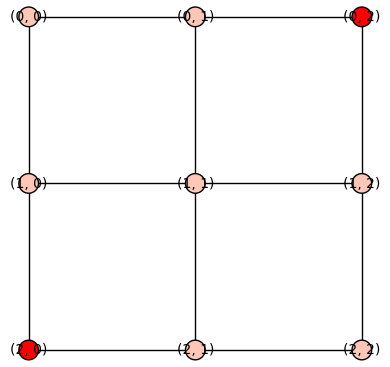

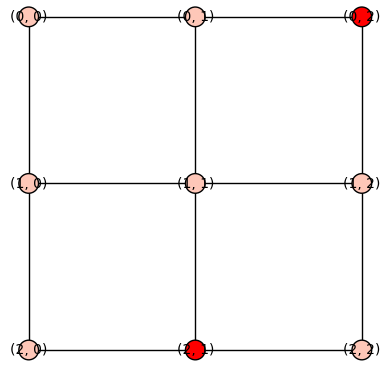

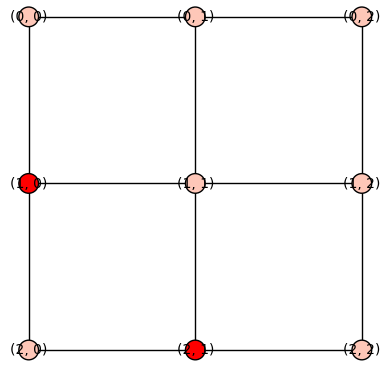

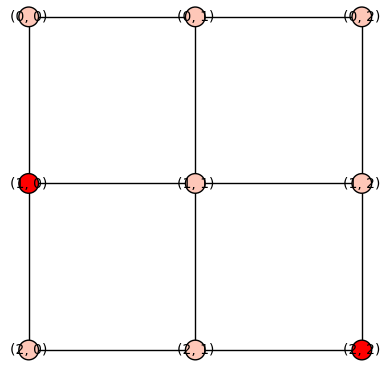

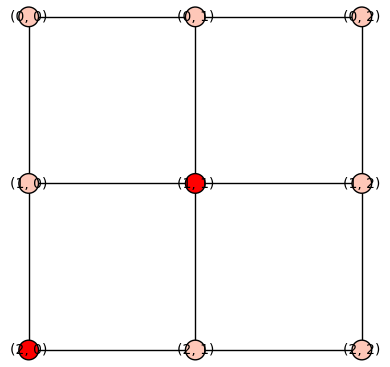

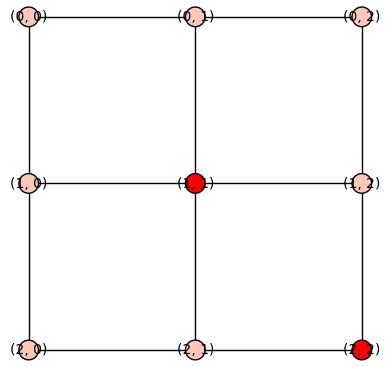

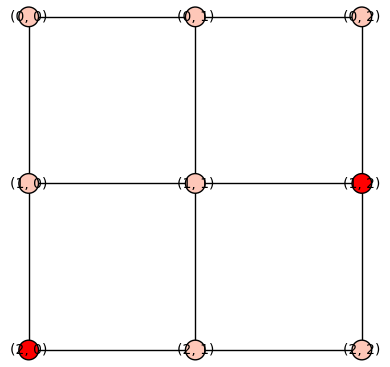

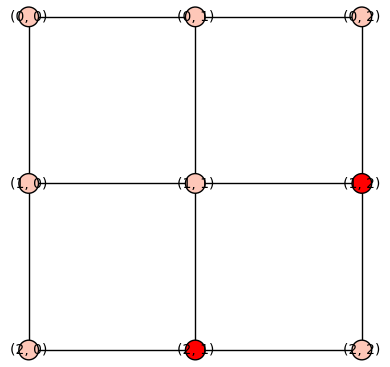

In [13]:
n=2
m=3

G=graphs.Grid2dGraph(m,m)


for sol in rook_placement(n,m):
    G.show(vertex_colors={'red': sol})

A version with generators is the following:

In [14]:
def rook_placement_gen (n,m):
# returns a generator containing all the ways of selecting n cells in an m x m grid
# in such a way that there are no two cells in the same row or column
    
    def recursive_rook_placement_gen(n,m,k,forbidden_cols):
#         Auxiliar recursive function that computes a partial solution for the rook placement problem
#         in which only cells in the last m-k rows 
#         and in the columns that do not belong to forbidden_cols can be used

#         forbidden_cols is a set of columns that cannot be used in the solution

#         returns a list containing all the ways of selecting n cells in the last m-k rows of an m x m grid
#         in such a way that there are no two cells in the same row or column, 
#         and no cell is in one of the forbidden_cols


        
        if n>m-k:
#             if we do not have enough columns to place all cells, we cannot complete this solution. 

#             we backtrack and return
            return 



        if n<=0:
#             if we do not have anything to add then the empty solution is the only solution

            yield []
            return
        
        

        for i in range(k,m):
#                 we try to continue our solution when the next noempty row is i
            for j in range(m):
#                 we try to insert the cell (i,j)

                if not j in forbidden_cols:
                    forbidden_cols.add(j)

                    for sol in recursive_rook_placement_gen(n-1,m,i+1,forbidden_cols):
                        sol.append((i,j))
                        
#                         a solution has been found
                        
                        yield sol

                    forbidden_cols.remove(j)
         
        return

                

#     the main function just calls the recursive function with no forbidden rows and k=0

    return recursive_rook_placement_gen(n,m,0,set())
    

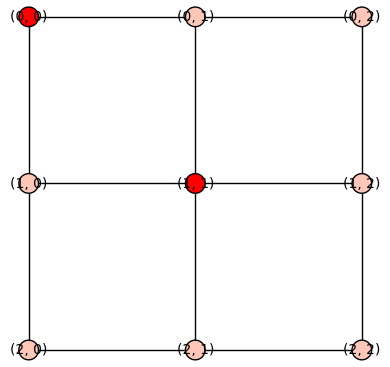

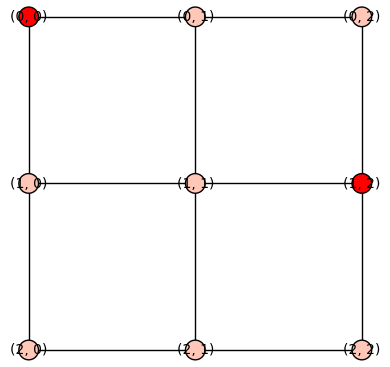

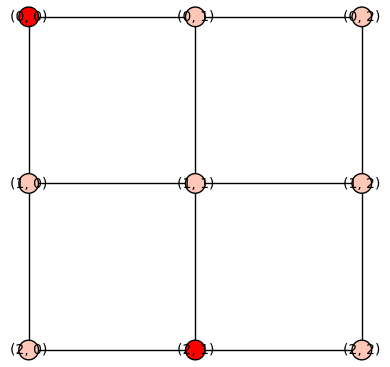

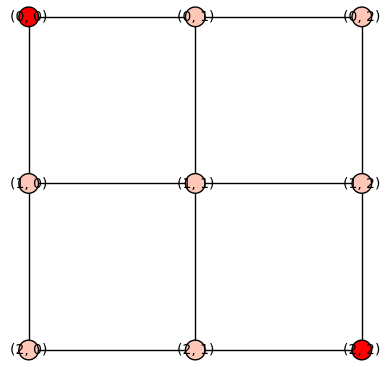

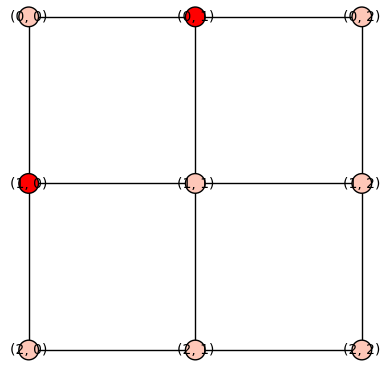

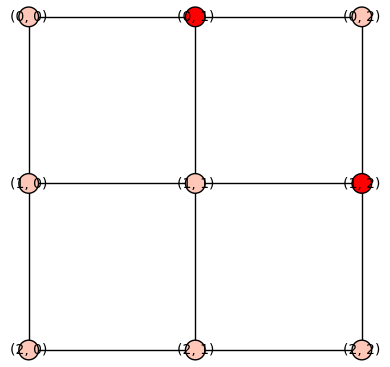

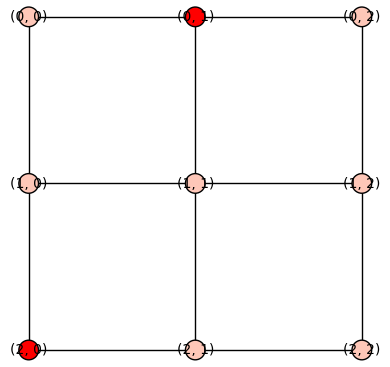

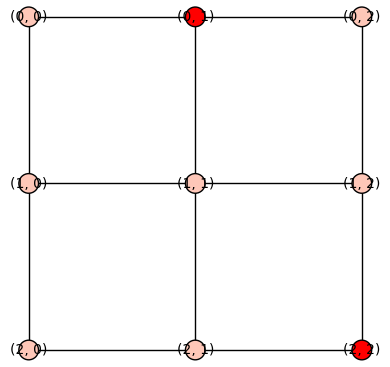

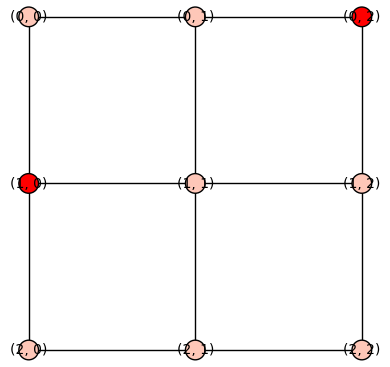

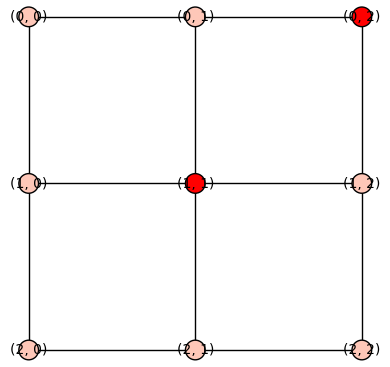

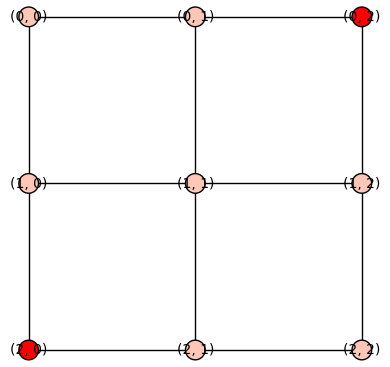

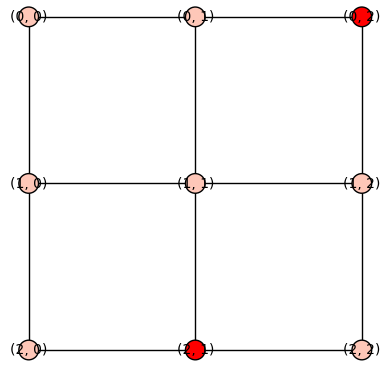

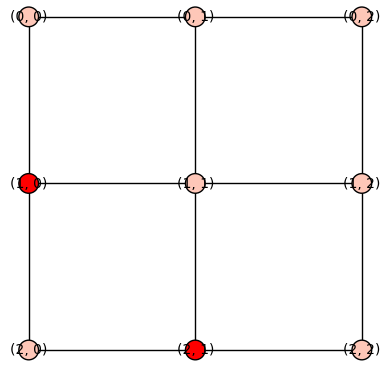

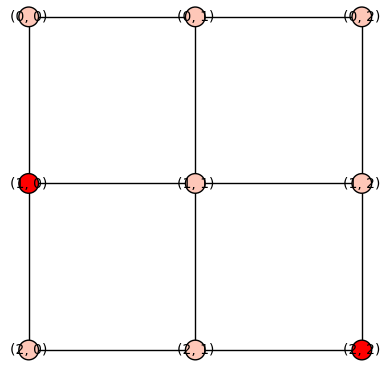

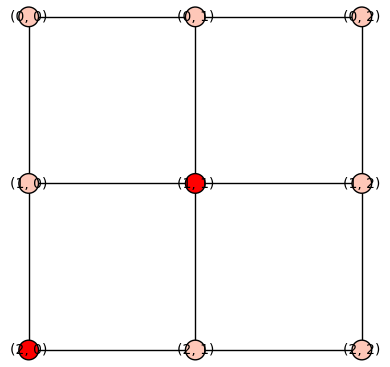

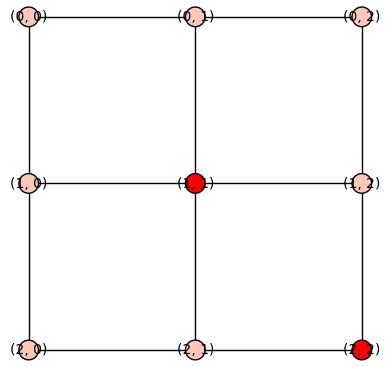

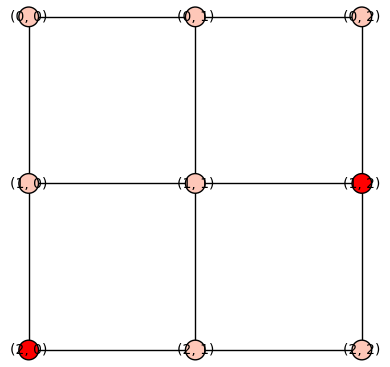

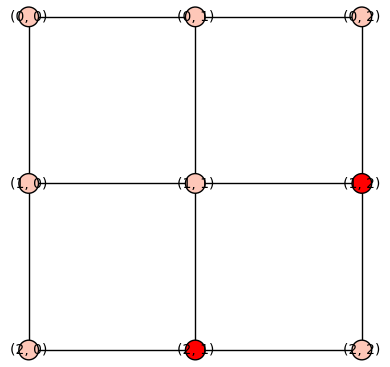

In [15]:
n=2
m=3

G=graphs.Grid2dGraph(m,m)


for sol in rook_placement_gen(n,m):
    G.show(vertex_colors={'red': sol})